In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [127]:
from extra_methods import P_rates_sediments, P_wc_rates, boundary_P_fluxes, savefig

In [3]:
Fe_20y_hdf = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_20x_200g_full_scen_base_historical_20y17m_sediment_2015_2100.mat', 'r')

In [4]:
P_rates_sediments(Fe_20y_hdf, start=-365 * 20, end=-1)

R31a: -33.073
R32a: -0.000
R33a: -0.440
R33b: 1.939
R34a: -5.631
R34b: 0.217
R35a: -0.004
Ra: 2.053
Rf: 0.042
Rc: 0.000
R3a_P: 12.130
R3b_P: 24.443
R3f_P: 0.131
R3c_P: 0.000
R4a_P: 0.000
R4b_P: 0.000
R4f_P: 0.000
R4c_P: 0.000
sum: 1.807


In [5]:
P_rates_sediments(Fe_20y_hdf, start=-365 * 40, end=-365 * 20)

R31a: -33.440
R32a: -0.000
R33a: -0.580
R33b: 2.244
R34a: -3.123
R34b: 0.319
R35a: -0.002
Ra: 2.159
Rf: 0.039
Rc: 0.000
R3a_P: 11.100
R3b_P: 22.531
R3f_P: 0.113
R3c_P: 0.000
R4a_P: 0.000
R4b_P: 0.000
R4f_P: 0.000
R4c_P: 0.000
sum: 1.361


In [6]:
P_wc_rates(Fe_20y_hdf, start=-365 * 40, end=-365 * 20)

Re: 0.553
Rc: 0.459
Growth_bioz: -1.978
Loss_bioz: 4.845
R31a: -0.451
R32a: -0.000
R33a: -0.000
R34a: -0.000
sum: 3.427


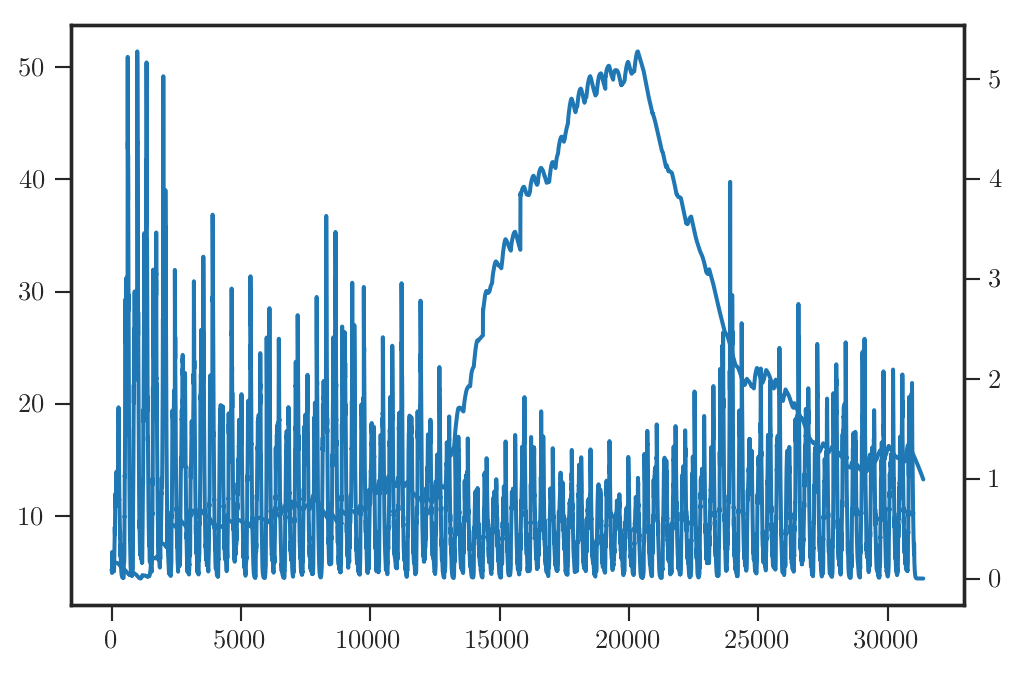

In [7]:
plt.plot(np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:]),axis=1)/2.5/1000*100)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['Chl'][:,:]),axis=1))
# ax3 = ax2.twinx()
# ax3.plot(np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1))

In [8]:
days = len(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['C'])[:,8])

In [42]:
date = datetime(2015-53, 1, 1)
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [43]:
Fe_pd = pd.DataFrame({'Date': ds})
Fe_pd['DIP fx'] = np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(Fe_20y_hdf['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
Fe_pd['Fe(III) sed'] = np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:100]),axis=1)/2.5/1000*100
Fe_pd['DIP 4m'] = np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1)
Fe_pd['Phy'] = np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['Chl'][:,:13]),axis=1) + np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['C'][:,:13]),axis=1)
Fe_pd['Year'] = Fe_pd.Date.dt.year
Fe_pd['Month'] = Fe_pd.Date.dt.month
Fe_pd['Day'] = Fe_pd.Date.dt.day
Fe_pd['DOY'] = Fe_pd.Date.dt.dayofyear
Fe_pd['WOY'] = Fe_pd.Date.dt.weekofyear

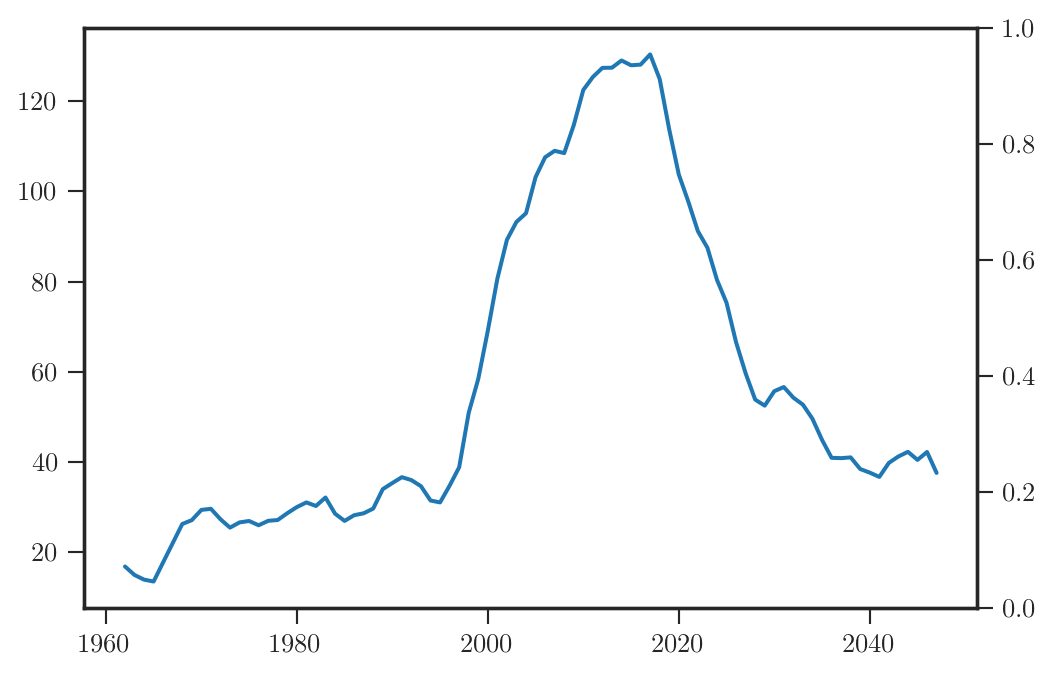

In [44]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,4))
ax1.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Fe(III) sed'])
ax2 = ax1.twinx()

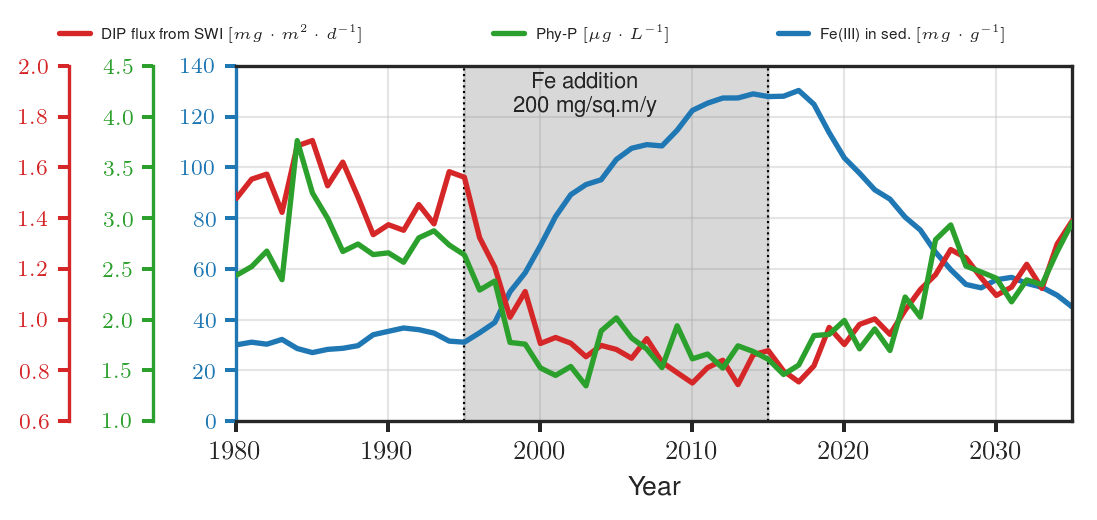

In [188]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, (host) = plt.subplots(1,1, figsize=(6,3))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Fe(III) sed'], c=sns.color_palette()[0], label="Fe(III) in sed. $[mg\cdot g^{-1}]$", lw=2)
p2, = par1.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['DIP fx'], c=sns.color_palette()[3], label="DIP flux from SWI $[mg\cdot m^2\cdot d^{-1}]$", lw=2)
p3, = par2.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Phy'], c=sns.color_palette()[2], label="Phy-P $[\mu g\cdot L^{-1}]$", lw=2)

host.set_xlim(1980, 2035)
host.set_ylim(0, 140)
par1.set_ylim(0.6, 2)
par2.set_ylim(1, 4.5)

host.set_xlabel("Year")
# host.set_ylabel("Fe(III) sed")
# par1.set_ylabel("DIP fx")
# par2.set_ylabel("Phy")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), labelsize='small', **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), labelsize='small', **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), labelsize='small', **tkw)
host.tick_params(axis='x', **tkw)

par1.spines["left"].set_position(("axes", -0.2)) # red one
par2.spines["left"].set_position(("axes", -0.1)) # green one
host.spines["left"].set_color(p1.get_color()) # green one
par1.spines["left"].set_color(p2.get_color()) # green one
par2.spines["left"].set_color(p3.get_color()) # green one

make_patch_spines_invisible(par1)
make_patch_spines_invisible(par2)

par1.spines["left"].set_visible(True)
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')

par2.spines["left"].set_visible(True)
par2.yaxis.set_label_position('left')
par2.yaxis.set_ticks_position('left')

lines = [p1, p2, p3]

# host.legend(lines, [l.get_label() for l in lines], loc=2, frameon=1, fontsize='xx-small')
host.grid(alpha=0.5)

host.vlines([1995,2015], 0,140, linestyle=':', lw=.8)
host.axvspan(1995, 2015, alpha=0.3, color='gray')

# legend1 = pyplot.legend(, ["algo1", "algo2", "algo3"], loc=1)
shiftx = 0.1
host.legend([lines[0]], [lines[0].get_label()], loc=(0.54+shiftx,1.05), frameon=0, fontsize='xx-small')
par1.legend([lines[1]], [lines[1].get_label()], loc=(-0.32+shiftx,1.05), frameon=0, fontsize='xx-small')
par2.legend([lines[2]], [lines[2].get_label()], loc=(0.2+shiftx,1.05), frameon=0, fontsize='xx-small')
# par1.add_artist(l2)
# plt.tight_layout()
host.text(2003,122, 'Fe addition\n200 mg/sq.m/y', fontsize='small', horizontalalignment='center')


plt.subplots_adjust(left=0.2, bottom=0.15, right=None, top=None,
                wspace=None, hspace=None)

# host.margins(x=1, y=1)
# plt.gcf().subplots_adjust(bottom=0.15)
# plt.gcf().subplots_adjust(right=0.3)
plt.tight_layout(pad=2.5)

savefig('cc/Fe/Fe_Phy_Pfx')


plt.show()